In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%config IPCompleter.greedy = True

In [2]:
sns.set(
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(12,9)}
)

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# Напишем функцию которая пробегает по координатам и возвращает расстояние между точками

def haversine(lattitude1 , longitude1, lattitude2 , longitude2, r=6371):
    
    # Переведем широту и долготу в радианы, чтобы подставить из в формулу
    lattitude1 , lattitude2, longitude1 , longitude2 = [np.deg2rad(x) for x in (lattitude1 , lattitude2, longitude1 , longitude2)]
    
    # Напишем формулу
    lat_sin = np.sin((lattitude2 - lattitude1) /2) ** 2
    lat_cos = np.cos(lattitude1) * np.cos(lattitude2)
    lon_sin = np.sin((longitude2 - longitude1) /2) ** 2
    
    return 2 * r * np.arcsin((lat_sin + lat_cos * lon_sin) ** 0.5)

In [5]:
# Создадим столбец в котором будут храниться расстояния

df['distance'] = haversine(df['pickup_latitude'].values, 
                           df['pickup_longitude'].values, 
                           df['dropoff_latitude'].values, 
                           df['dropoff_longitude'].values)

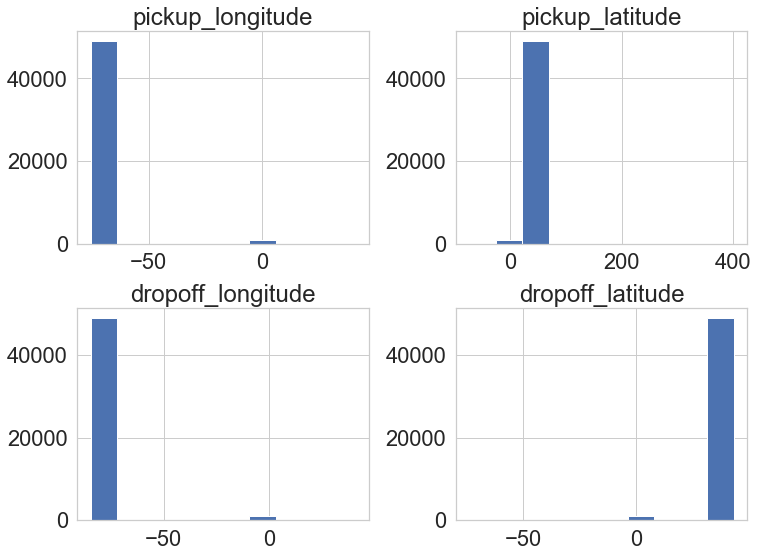

In [6]:
# Есть ли у нас пропуски в данных?

df[['pickup_longitude','pickup_latitude' ,'dropoff_longitude', 'dropoff_latitude']].hist()
plt.show()

In [7]:
# Кол-во значений где есть хотя бы одно нулевое значение

df[['pickup_longitude','pickup_latitude' ,'dropoff_longitude', 'dropoff_latitude']] \
    .eq(0).sum(1).gt(0).sum()

1000

In [8]:
# Отчистим данные от ошибок

df = df \
        .query('pickup_longitude < -60 & pickup_latitude < 120 & \
                pickup_latitude > 10 & dropoff_latitude > 10 & dropoff_longitude < -60')